In [2]:
from lib.unsupervised_learning import *
from lib.cross_validation_for_classification import *

In [2]:
bin_df = pd.read_csv('data/dataframes/df_after_cols_reduction.csv').iloc[:,1:]
pca_df = pd.read_csv('data/dataframes/pca_df.csv').iloc[:,1:]

print(f'Binary dataframe shape: {bin_df.shape}')
print(f'PCA dataframe shape: {pca_df.shape}')


NameError: name 'pd' is not defined

In [25]:
cat_cols = ['founded', 'business model','employees','product stage','status','funding stage','succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in bin_df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in bin_df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in bin_df.columns if col.startswith("sector_")]
target_ind_list = [col  for col in bin_df.columns if col.startswith("industry_")]
technology_list = [col  for col in bin_df.columns if col.startswith("technology_")]

pca_cols = [col for col in pca_df.columns[2:] if col not in cat_cols and col not in num_cols]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

NameError: name 'bin_df' is not defined

In [5]:
X_train, X_test, y_train, y_test = split_to_train_and_test(pca_df, 'succeeded', 0.2, 42, 'succeeded')
print(f'X_train shape: {X_train.shape}')
# print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')



X_train shape: (8056, 31)
y_train shape: (8056,)


In [5]:
X_train.columns
# sum_X_train = X_train['succeeded'].sum()
# sum_y_train = y_train.sum()
# print(f'X_train succeeded percentage: {sum_X_train/X_train.shape[0]}')
# print(f'y_train succeeded percentage: {sum_y_train/y_train.shape[0]}')

Index(['company_name', 'company_about', 'founded', 'business model',
       'employees', 'product stage', 'status', 'funding stage', 'total_raised',
       'total_rounds', 'investors', 'ipo_price', 'geo_market_per',
       'tag_cols_x', 'tag_cols_y', 'tag_cols_z', 'targetmarket_cols_x',
       'targetmarket_cols_y', 'targetmarket_cols_z', 'sector_list_x',
       'sector_list_y', 'sector_list_z', 'industry_list_x', 'industry_list_y',
       'industry_list_z', 'technology_list_x', 'technology_list_y',
       'technology_list_z', 'bin_cols_x', 'bin_cols_y', 'bin_cols_z'],
      dtype='object')

In [6]:
# X1 is the entire data without company name and about

X1 = bin_df.iloc[:,2:]
print(f'X1 shape: {X1.shape}')
df_scaled = scale_dataset(X1)

# X2 is the data without the binary columns

X2 = bin_df[cat_cols+num_cols]
print(f'X2 shape: {X2.shape}')
df_scaled2 = scale_dataset(X2)

# X3 is the PCA data 
X3 = pca_df[pca_cols]
print(f'X3 shape: {X3.shape}')
df_scaled3 = scale_dataset(X3)


X1 shape: (10070, 1925)
X2 shape: (10070, 12)
X3 shape: (10070, 18)


KMeans

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/dataframes/final_cleaned.csv').iloc[:,1:]
cat_cols = ['founded', 'business model','employees','product stage','status','funding stage','succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in data.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in data.columns if col.startswith('targetmarket_')]
sector_list = [col for col in data.columns if col.startswith("sector_")]
target_ind_list = [col  for col in data.columns if col.startswith("industry_")]
technology_list = [col  for col in data.columns if col.startswith("technology_")]

# pca_cols = [col for col in pca_df.columns[2:] if col not in cat_cols and col not in num_cols]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

data[bin_cols]


,tag_computer-vision,tag_behavior-analytics,tag_machine-learning,tag_consumer-packaged-goods,tag_natural-language-processing,tag_foodtech,tag_personalization,tag_artificial-intelligence,tag_data-analytics,tag_predictive-analytics,...,technology_Quantum Computing,technology_Data Storage_Flash,technology_Machinery & Robotics_Cobots,technology_Sensing_SWIR,technology_Materials & Substances_Adhesive,technology_Materials & Substances_Nonwoven Fabric,technology_Materials & Substances_Insulation,technology_Sensing_Scent,technology_Machinery & Robotics_Exoskeleton,technology_Materials & Substances_Implants
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data['succeeded']

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
10065    1.0
10066    0.0
10067    1.0
10068    1.0
10069    0.0
Name: succeeded, Length: 10070, dtype: float64

In [32]:
data_bin_cols = data[bin_cols + cat_cols + num_cols]
from sklearn.preprocessing import normalize
data_scaled = normalize(data_bin_cols)
data_scaled = pd.DataFrame(data_scaled, columns=data_bin_cols.columns)

# import scipy.cluster.hierarchy as shc
# plt.figure(figsize=(10, 7))  
# plt.title("Dendrograms")  
# dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred = pd.Series(cluster.fit_predict(data_scaled))

In [37]:
cat_cols.remove('founded')

In [38]:
cat_cols

['business model', 'employees', 'product stage', 'status', 'funding stage']

In [35]:
metrics.f1_score(data['succeeded'], y_pred)

0.7035116313527929

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['succeeded'], data_scaled['Grocery'], c=cluster.labels_) 

In [7]:
# Perform kmeans on X1 - all columns

score, method, n = get_best_kmeans_values(df_scaled3, range(2,10), ['random','k-means++'] ,10, None)
score, method, n

(0.22193133408194618, 5, 'random')

In [8]:
# Perform kmeans on X2 - no binary columns
# ~ 30 sec runtime

score, method, n = get_best_kmeans_values(df_scaled2, range(2,10), ['random','k-means++'] ,10, None)
score, method, n

(0.32576085782315484, 2, 'k-means++')

Hierarchical clustering

In [9]:
# Perform hierarchical clustering on X1 - all columns

df_model, best_score, best_linkage, best_n = get_best_linkage_method(df_scaled, [3], ['ward', 'complete', 'average', 'single'])
best_score, best_linkage, best_n

(0.5656978993883495, 'average', 3)

In [10]:
# Perform hierarchical clustering on X2 - no binary columns
# ~ 2 min runtime

df2_model, best_score, best_linkage, best_n = get_best_linkage_method(df_scaled3, range(3,10), ['ward', 'complete', 'average', 'single'])
best_score, best_linkage, best_n

(0.3308907410763717, 'single', 3)

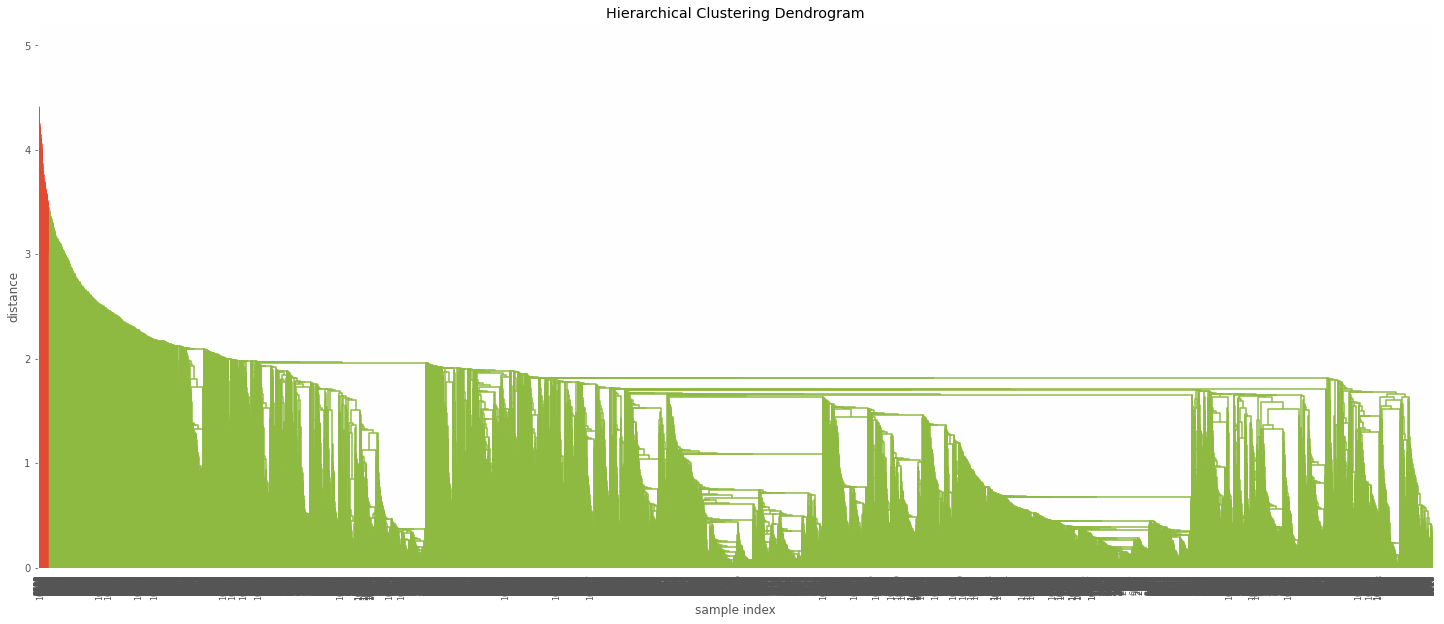

In [8]:
# Plotting dendrogram for best_linkage param
# ~ 4 min runtime

Z = linkage(df_scaled3, 'single') # generate the linkage array
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.hlines(20, 0, 4000)
plt.show()

In [15]:
# Plotting dendrogram for best_linkage param
# ~ 4 min runtime

Z = linkage(df_scaled, 'single') # generate the linkage array
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.hlines(20, 0, 4000)
plt.show()

KeyboardInterrupt: 

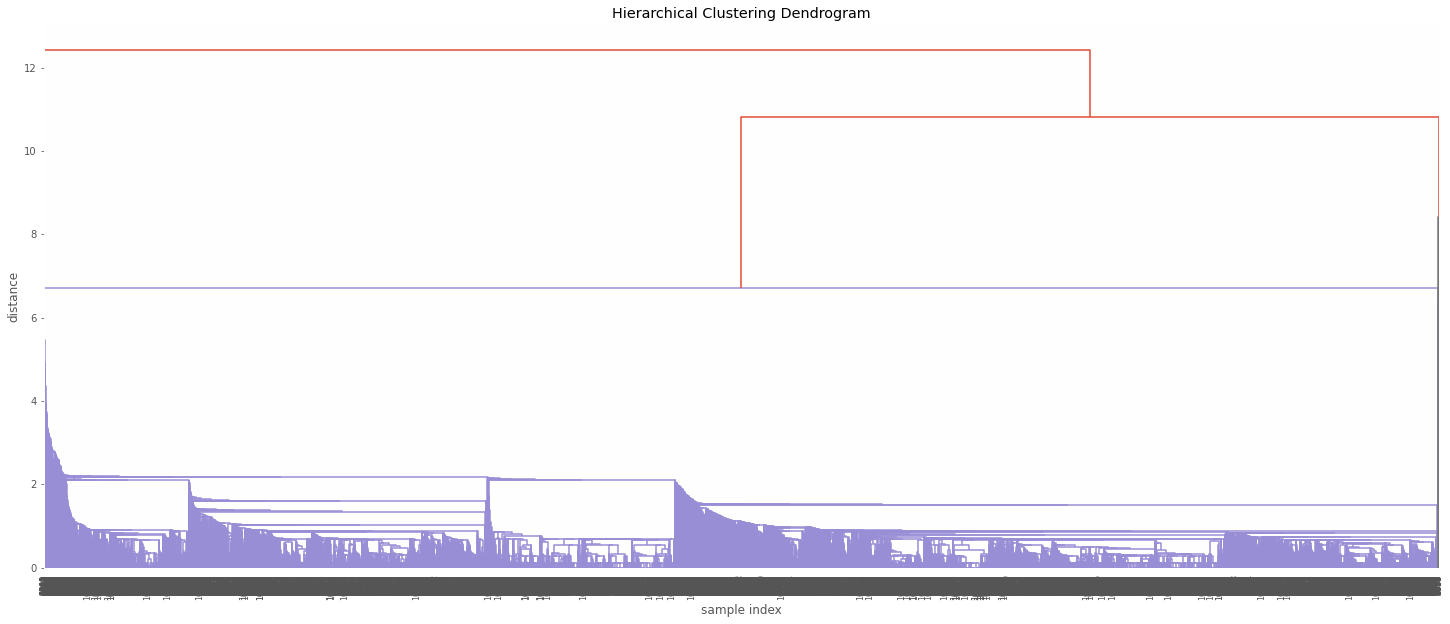

In [16]:
# Plotting dendrogram for best_linkage param
# ~ 4 min runtime

Z = linkage(df_scaled2, 'single') # generate the linkage array
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.hlines(20, 0, 4000)
plt.show()

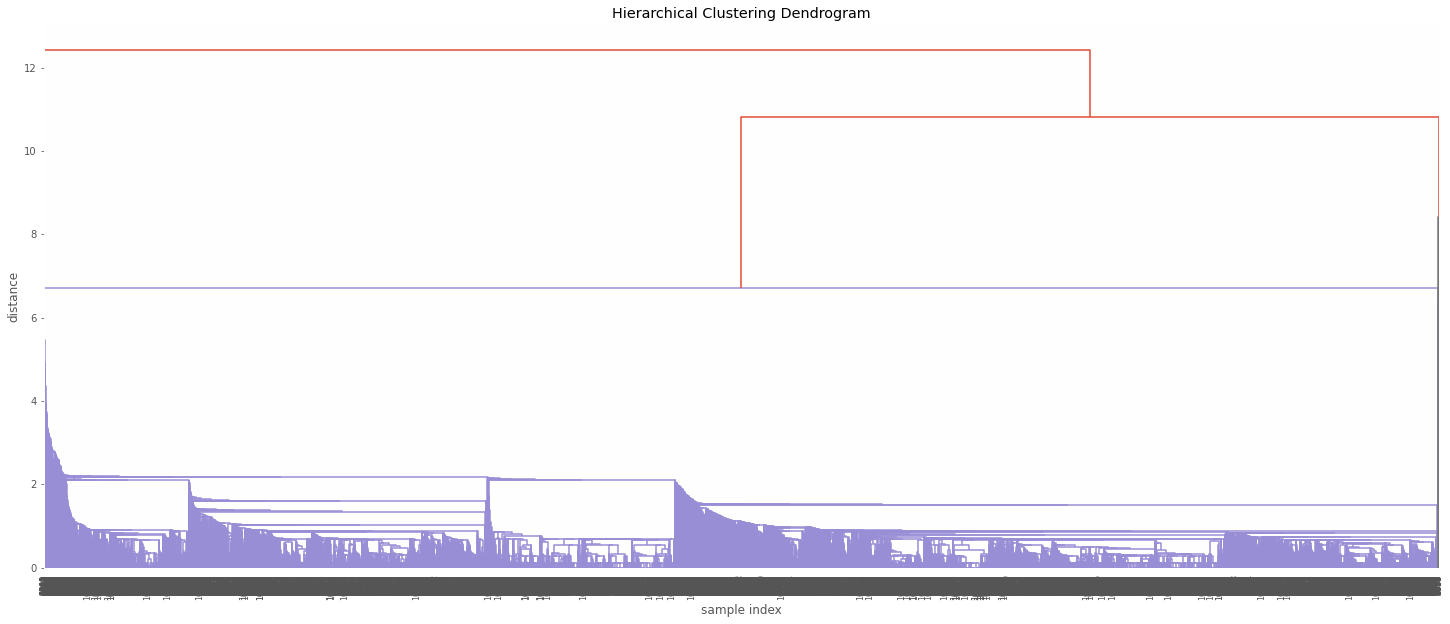

In [18]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dn = dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

We can see the line cutting the 

DBScan

In [ ]:
# Perform DBScan on X1 - all columns

def gget_best_params_for_dbscan(dataset, eps_options, min_samples_options):
    scores = []
    results = {}
    print(f"eps_options: {eps_options}, min_samples_options: {min_samples_options}, len(eps_options): {len(eps_options)}, len(min_samples_options): {len(min_samples_options)}")
    for minimum_samples_val in min_samples_options:
        for epsilon_val in eps_options:
            model, predicted_vals = perform_density_based_clustering(dataset, epsilon_val, minimum_samples_val)

            score = silhouette_score(dataset, predicted_vals)
            scores.append(score)
            results[score] = {"minimum_samples_val": minimum_samples_val, "epsilon_val": epsilon_val}
    best_score = max(scores)
   
    return best_score, results[best_score]['epsilon_val'], results[best_score]['minimum_samples_val']

score, best_eps, best_min = gget_best_params_for_dbscan(df_scaled, [3],[5])
score, best_eps, best_min

In [ ]:
# Perform DBScan on X2 - no binary columns

score, best_eps, best_min = get_best_params_for_dbscan(df_scaled3, [3,5,10,15],[3,4,5,6,7,8,9])
score, best_eps, best_min